In [4]:
from sklearn import datasets 
import numpy as np
from sklearn import preprocessing 
import pandas as pd #It imports the necessary modules from scikit-learn

In [2]:
iris = datasets.load_iris() #The Iris dataset is loaded using the load_iris() function from the datasets module
X = iris.data[:, [2, 3]]  #The features of interest are extracted from the Iris dataset. Only the third and fourth columns of the data are selected and stored in the variable X
y = iris.target  #The target variable (class labels) is assigned to the variable y
std_scale = preprocessing.StandardScaler().fit(X)
X_std = std_scale.transform(X)
minmax_scale = preprocessing.MinMaxScaler().fit(X)
X_minmax = minmax_scale.transform(X)

A StandardScaler object is created from the preprocessing module, and the fit() method is applied to the feature matrix X. This step calculates the mean and standard deviation of the features in X for later standardization

The feature matrix X is transformed using the calculated mean and standard deviation, resulting in a standardized version stored in X_std

A MinMaxScaler object is created from the preprocessing module, and the fit() method is applied to the original feature matrix X. This step calculates the minimum and maximum values of the features in X for later scaling

The feature matrix X is transformed using the calculated minimum and maximum values, resulting in a scaled version stored in X_minmax

In summary, this code snippet loads the Iris dataset, selects specific features, standardizes the feature matrix X using the StandardScaler, and scales X using the MinMaxScaler. These preprocessing steps are commonly used to normalize and scale input data before training machine learning models.







In [5]:
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
columns= iris['feature_names'] + ['species'])
# replace the values with class labels
iris.species = np.where(iris.species == 0.0, 'setosa', np.where(iris.species==1.0,'versicolor', 'virginica'))
# let's remove spaces from column name
iris.columns = iris.columns.str.replace('','')
iris.describe()
#The columns ‘species’ is categorical, so lets check the frequency distribution for each
#category.
print(iris['species'].value_counts())

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64


In summary, the code prepares the iris dataset for analysis by creating a DataFrame, replacing numerical values with class labels, removing spaces from column names, and providing summary statistics and frequency distribution information.

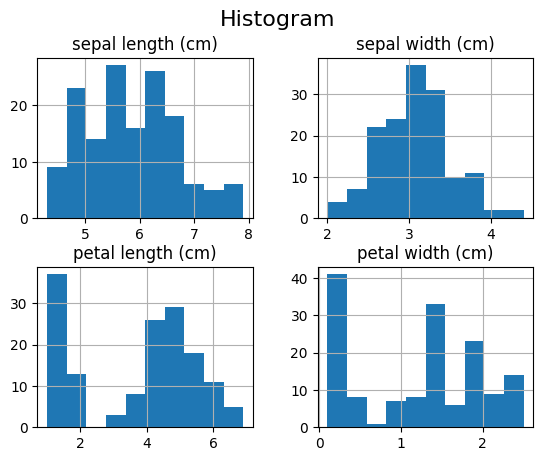

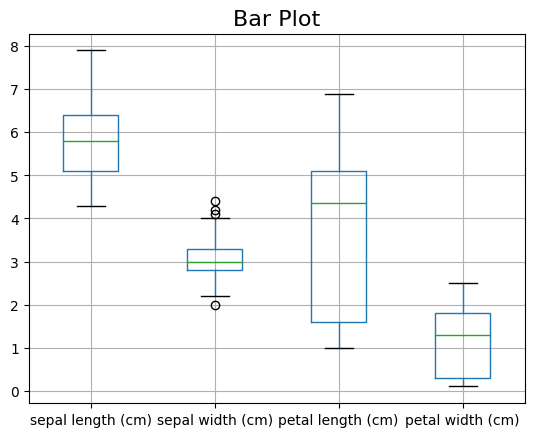

In [6]:
import matplotlib.pyplot as plt
iris.hist() # plot histogram
plt.suptitle("Histogram", fontsize=16) # use suptitle to add title to all
plt.show()

iris.boxplot() # plot boxplot
plt.title("Bar Plot", fontsize=16)
plt.show()

In summary, the code creates and displays histograms and box plots for the iris dataset using matplotlib. The histograms visualize the distribution of values for each column, while the box plots display the statistical summary and outliers for each column.

            sepal length (cm)  sepal width (cm)  petal length (cm)  \
species                                                              
setosa                  5.006             3.428              1.462   
versicolor              5.936             2.770              4.260   
virginica               6.588             2.974              5.552   

            petal width (cm)  
species                       
setosa                 0.246  
versicolor             1.326  
virginica              2.026  


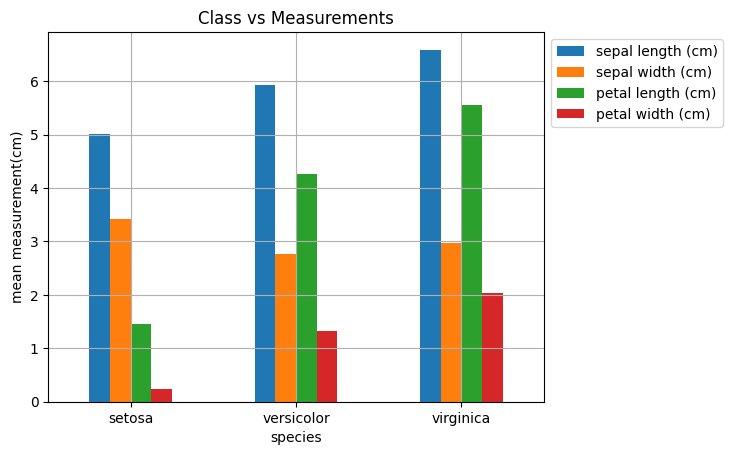

In [7]:
print(iris.groupby(by = "species").mean())
# plot for mean of each feature for each label class
iris.groupby(by = "species").mean().plot(kind="bar")
plt.title('Class vs Measurements')
plt.ylabel('mean measurement(cm)')
plt.xticks(rotation=0) # manage the xticks rotation
plt.grid(True)
# Use bbox_to_anchor option to place the legend outside plot area to be tidy
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

In summary, the code calculates the mean values for each feature grouped by the "species" column and prints the result. It then creates a bar plot to visualize the mean values for each feature, with appropriate labels, title, grid lines, and a legend placed outside the plot area. The plot allows for easy comparison of the mean measurements among different species.






<ipython-input-8-30b888ab6e2b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = iris.corr()


                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


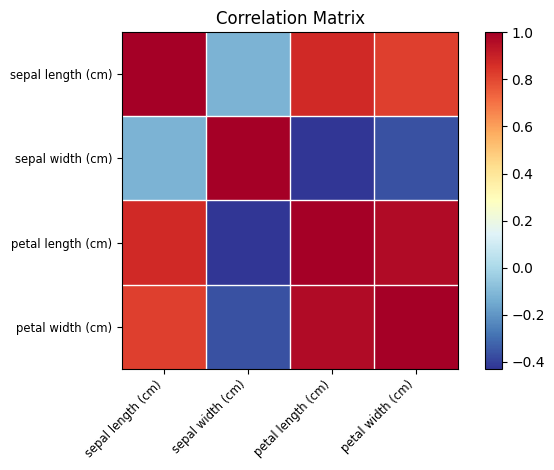

In [8]:
# create correlation matrix
corr = iris.corr()
print(corr)
import statsmodels.api as sm
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

In summary, the code calculates the correlation matrix for the iris dataset, prints it, and then creates and displays a correlation plot using statsmodels.graphics. The correlation plot visualizes the strength and direction of the relationships between different features in the dataset.




